Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense

**Dwa gangi**

Zbiór danych:

In [39]:
[0]*10+[1]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [40]:
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000) 
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2)
ys = np.append(y_label1, y_label2) 
labels = np.asarray([0.]*len(x_label1)+[1.]*len(x_label2))
labels

array([0., 0., 0., ..., 1., 1., 1.])

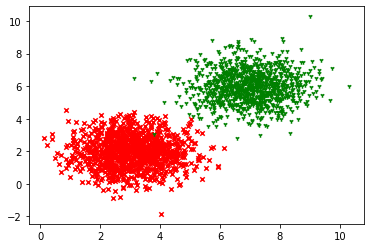

In [41]:
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.show()

In [42]:
x_label1

array([1.19276022, 0.68060322, 2.25956428, 4.43380764, 2.43335735,
       3.75459306, 4.14053844, 3.71482513, 2.73727413, 3.6342153 ,
       3.22875483, 3.43004763, 3.80872559, 3.71981679, 2.37078294,
       2.43332518, 4.72294635, 3.13875573, 1.83974755, 2.99322246,
       3.48243548, 2.94114447, 3.14063266, 4.5634114 , 2.70461592,
       2.57401632, 1.54266225, 2.29285312, 1.74887865, 1.50614848,
       4.35086486, 2.68124274, 3.49974327, 2.82933255, 3.27992263,
       1.85431449, 1.81379632, 0.86789542, 2.17595333, 3.02456244,
       4.25735219, 3.08461307, 4.11133115, 2.44255595, 1.82235236,
       2.71231766, 2.38817496, 3.41985857, 2.66256037, 2.0610741 ,
       3.19521683, 3.76181549, 1.88986529, 1.91623535, 1.63915831,
       2.59325229, 2.77239708, 4.32984682, 2.86170551, 2.37276816,
       1.42901613, 0.23043173, 2.75003915, 2.52812378, 2.29582648,
       3.30717495, 2.67668178, 2.90456121, 3.81352023, 2.85894625,
       3.21435823, 2.34630717, 2.6018998 , 1.20778558, 2.25529

Definiujemy model:

In [43]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [44]:
model.add(Dense(units = 3, use_bias=True, input_dim=2, activation = "sigmoid"))
model.add(Dense(units = 1, use_bias=True, activation = "sigmoid"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [45]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.2)

In [46]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 9         
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


Przygotowanie danych:

In [48]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[1.19276022, 3.79214336],
       [0.68060322, 0.71113941],
       [2.25956428, 1.27320275],
       ...,
       [7.25829277, 7.28787535],
       [6.78714613, 6.88925493],
       [5.80465651, 5.11747271]])

Proces **uczenia**:

In [49]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 1s 4ms/step - loss: 0.6874 - val_loss: 0.9184
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6651 - val_loss: 0.9938
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6522 - val_loss: 0.9576
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6322 - val_loss: 0.8854
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5984 - val_loss: 0.8458
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.5202 - val_loss: 0.7106
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4141 - val_loss: 0.5754
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3270 - val_loss: 0.4304
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2552 - val_loss: 0.3193
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2003 - val_loss: 0.3114
Epoch 11/

In [50]:
Loss = h.history['loss']
Loss

[0.68744957447052,
 0.6650965213775635,
 0.6521901488304138,
 0.6322352886199951,
 0.5983567237854004,
 0.5202049016952515,
 0.4140858054161072,
 0.3270336985588074,
 0.2552003562450409,
 0.2003251314163208,
 0.1596696823835373,
 0.13082478940486908,
 0.10969604551792145,
 0.09239989519119263,
 0.08010376244783401,
 0.07132697850465775,
 0.0636063739657402,
 0.057147327810525894,
 0.05196329578757286,
 0.04757170379161835,
 0.04402710497379303,
 0.04104076325893402,
 0.03867308422923088,
 0.036512769758701324,
 0.03430413827300072,
 0.03268780559301376,
 0.0316120944917202,
 0.029706543311476707,
 0.028592251241207123,
 0.0273686982691288,
 0.026056084781885147,
 0.025564996525645256,
 0.024780599400401115,
 0.023672621697187424,
 0.022648580372333527,
 0.022533614188432693,
 0.021991416811943054,
 0.02132689766585827,
 0.020702552050352097,
 0.02001638151705265,
 0.019882777705788612,
 0.01916617900133133,
 0.019194193184375763,
 0.01916137896478176,
 0.018921086564660072,
 0.01818466

Sprawdźmy jakie są **wartości wag**:

In [51]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[-0.6585891  -0.29898286  0.4724988 ]
 [-0.70752895 -0.49309435  0.56131923]]
[ 6.0124297  2.8032994 -4.2576523]


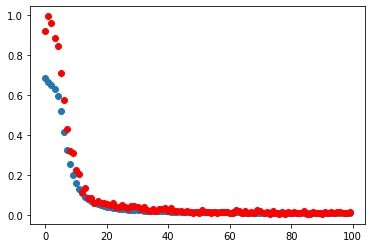

In [52]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

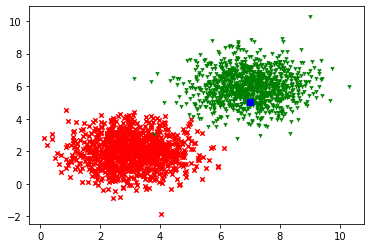

In [53]:
x=7.0
y=5.0 
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [54]:
model.predict([[x,y]])

1/1 [==============================] - 0s 56ms/step


array([[0.9924081]], dtype=float32)